In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Preprocessing

   ### Data extraction:

In [2]:
#reading file from csv
auto_data = pd.read_csv('./Resources/adverts.csv')

In [13]:
# making a copy of the data and using only a sample of the data
a_data_copy = auto_data.copy().sample(n=5000, ignore_index=True)

# visualy inspecting data
print(a_data_copy.shape)
a_data_copy.head(15)

(5000, 12)


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202008122408433,10.0,NaN,Grey,Audi,TT,NEW,NaN,41444,Coupe,False,Petrol
1,202010175103363,17333.0,67,White,Volkswagen,up!,USED,2018.0,7995,Hatchback,False,Petrol
2,202010134970601,61000.0,08,Black,Saab,9-3,USED,2008.0,3995,Estate,False,Diesel
3,202010285545904,98000.0,11,Silver,BMW,X3,USED,2011.0,8490,SUV,False,Diesel
4,202007161295721,157000.0,59,White,Mercedes-Benz,C Class,USED,2009.0,3500,Saloon,False,Diesel
5,202010275498236,107000.0,55,Silver,Volkswagen,Golf,USED,2005.0,3850,Hatchback,False,Petrol
6,202009224068175,21282.0,17,Blue,BMW,2 Series,USED,2017.0,13000,Coupe,False,Petrol
7,202010124902493,10.0,NaN,Grey,Nissan,Qashqai,NEW,NaN,19390,SUV,False,Petrol
8,202009163805811,53539.0,62,Grey,BMW,X3,USED,2012.0,12495,SUV,False,Diesel
9,202009173863865,62740.0,64,Red,Toyota,RAV4,USED,2014.0,9995,SUV,False,Diesel


### Data exploration:

In [21]:
# Data Types of the columns
a_data_copy.dtypes

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

In [5]:
#finding all null or nan values in data
a_data_copy.isnull().sum()

public_reference           0
mileage                    1
reg_code                 361
standard_colour           73
standard_make              0
standard_model             0
vehicle_condition          0
year_of_registration     374
price                      0
body_type                  8
crossover_car_and_van      0
fuel_type                  4
dtype: int64

In [23]:
#checking the values in each column
for column in a_data_copy.columns:
    print(a_data_copy[column].value_counts())

202008122408433    1
202010155017195    1
201908161216496    1
202008192668268    1
202010084754380    1
                  ..
202006069873766    1
202010225306407    1
201906269436273    1
202010155042708    1
202009143724405    1
Name: public_reference, Length: 5000, dtype: int64
0.0        190
10.0       172
5.0         25
35000.0     25
60000.0     24
          ... 
78779.0      1
15651.0      1
4617.0       1
4856.0       1
30877.0      1
Name: mileage, Length: 3191, dtype: int64
17    862
67    386
66    323
69    302
18    282
16    273
19    221
68    197
65    195
64    174
20    150
14    146
15    138
70    132
63    117
13    114
62     94
11     90
60     89
61     81
12     73
59     66
10     65
09     54
08     44
58     43
57     42
07     38
56     35
06     23
55     21
54     18
05     17
04     15
03     14
53     10
X       8
Y       6
52      5
S       5
51      5
R       3
V       3
K       3
02      3
L       2
H       2
P       2
B       2
J       1
N       1
E

#### Based on initial visual analysis the next step is to select a subset of features of intrest and perform further analsis

In [25]:
data_subset = a_data_copy[['mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'body_type', 'crossover_car_and_van',
       'fuel_type']]

data_subset.head(10)

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type
0,10.0,17,Grey,Audi,TT,NEW,2015.075529,Coupe,False,Petrol
1,17333.0,67,White,Volkswagen,up!,USED,2018.000000,Hatchback,False,Petrol
2,61000.0,08,Black,Saab,9-3,USED,2008.000000,Estate,False,Diesel
3,98000.0,11,Silver,BMW,X3,USED,2011.000000,SUV,False,Diesel
4,157000.0,59,White,Mercedes-Benz,C Class,USED,2009.000000,Saloon,False,Diesel
5,107000.0,55,Silver,Volkswagen,Golf,USED,2005.000000,Hatchback,False,Petrol
6,21282.0,17,Blue,BMW,2 Series,USED,2017.000000,Coupe,False,Petrol
7,10.0,17,Grey,Nissan,Qashqai,NEW,2015.075529,SUV,False,Petrol
8,53539.0,62,Grey,BMW,X3,USED,2012.000000,SUV,False,Diesel
9,62740.0,64,Red,Toyota,RAV4,USED,2014.000000,SUV,False,Diesel


In [31]:
# get quantitative features
quant_features = data_subset.select_dtypes(include=['int64', 'float64'])

# get qualitative features
qual_features = data_subset.select_dtypes(exclude=['int64', 'float64'])

array([[<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'year_of_registration'}>]],
      dtype=object)

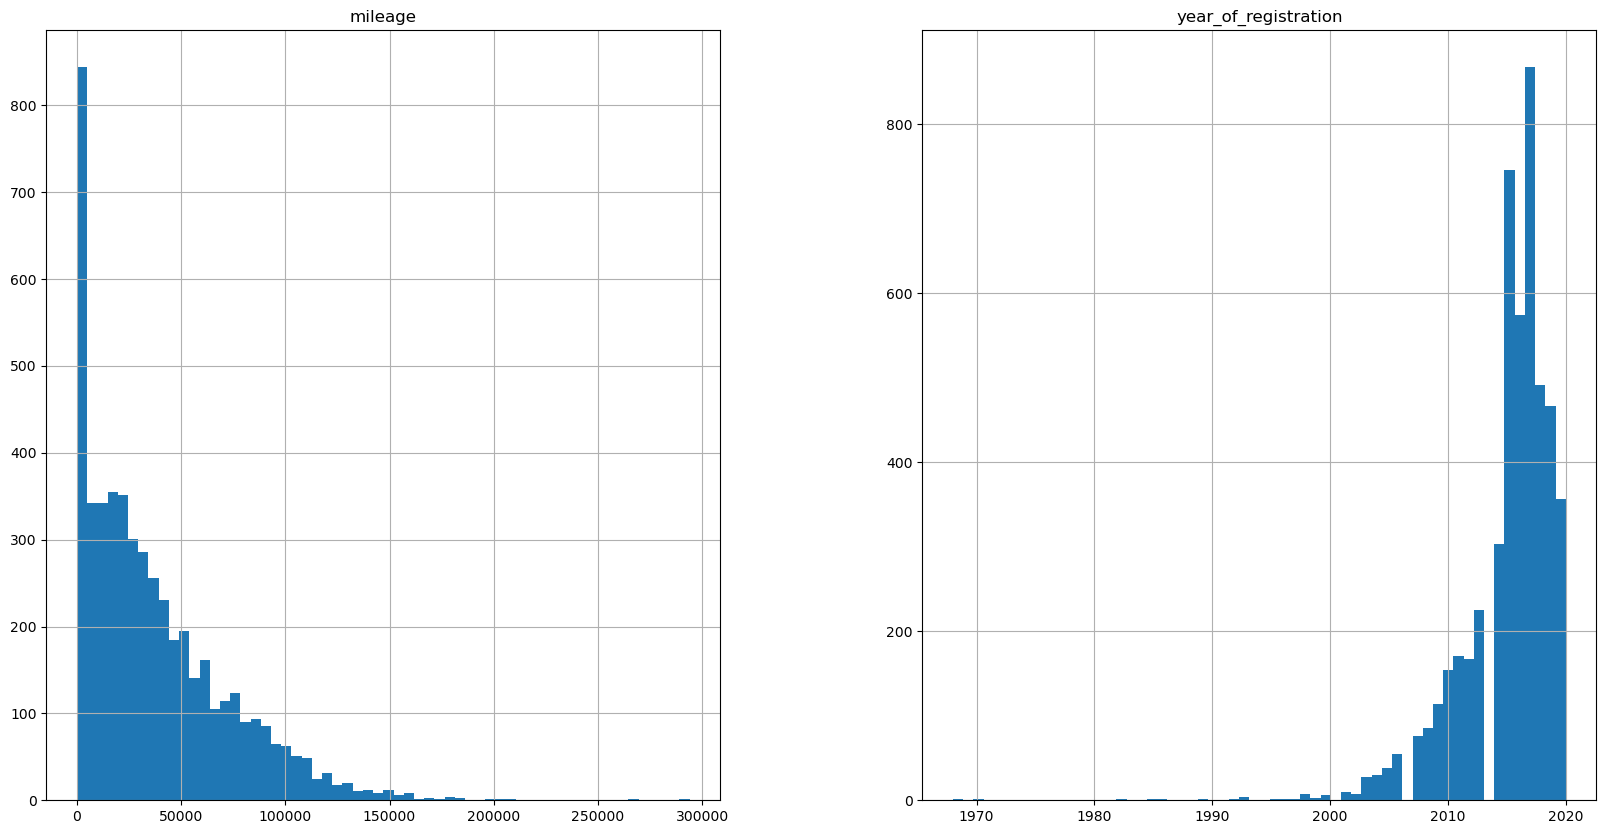

In [33]:
# checking outliers in quantitative features
quant_features.hist(bins=60, figsize=(20,10))

In [39]:
data_subset[data_subset["year_of_registration"]<= 1970]

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type
1523,87330.0,H,Blue,Triumph,TR6,USED,1970.0,Convertible,False,Petrol
3714,3400.0,G,Red,MG,MGB,USED,1968.0,Convertible,False,Petrol
4075,37920.0,H,Red,Aston Martin,DB6,USED,1970.0,Saloon,False,Petrol


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt 
# plt.figure(figsize=(10, 10))
# sns.set(font_scale=.9)
# sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')
# plt.show()

> During the initial observation of the data, multiple inconsistency such as ** NAN ** values were discovered
>
> as well as colums with mixed types. Valuable insights into the data was gained.

In [17]:
# converting NAN values in each column into mean or mode of the column
data_col = a_data_copy.columns
for header in data_col:
    dc = a_data_copy[header]
    if a_data_copy[header].dtypes =='O':
        dc_m = dc.fillna(a_data_copy[header].mode().iloc[0])
    else:
        dc_m = dc.fillna(value = a_data_copy[header].mean())
    a_data_copy.update({header: dc_m})
    
a_data_copy.isnull().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64